# Skriftlig innlevering 5, Oppgave 1 (av 3)

## Oppgave 1 *

Når to væsker A og B blandes sammen vil volumet av en ideell blanding av $x$ deler A og $1 − x$ deler B være lik volumet av $x$ deler A pluss volumet av $1 − x$ deler B. For en ikke-ideell blanding vil volumet avvike noe fra det ideelle tilfellet.

Man kan eksperimentelt bestemme avviket fra en ideell blanding når A og B blandes. La $x_1,x_2,\ldots,x_n$ være andeler av A som blandes med $1−x_1,1−x_2,\ldots,1−x_n$ andeler B, og la $Y_1,Y_2,\ldots,Y_n$ være **avviket** i volum som måles fra en ideell blanding. Vi antar at dette avviket er på formen

\begin{align*}
Y_i = \beta x_i (1-x_i) + \varepsilon_i,
\end{align*}

der $\varepsilon_1,\varepsilon_2,\ldots,\varepsilon_n$ er uavhengige og normalfordelte støyledd med forventningsverdi lik null og en varians $\sigma^2$. Dette betyr at $Y_1,Y_2,\ldots,Y_n$ er uavhengige og normalfordelte og at $E[Y_i] = \beta x_i (1-x_i)$ og $\mbox{Var}[Y_i]=\sigma^2$. For en ideel væske er $\beta$ lik null.

Merk at siden vi kan velge verdiene på $x_1,x_2,\ldots,x_n$, betrakter vi disse som kjente tall, mens vi betrakter $Y_1,Y_2,\ldots,Y_n$ som stokastiske variabler. I en reell situasjon vil nok både verdiene til $\beta$ og til $\sigma^2$ være ukjente, men for å forenkle situasjonen skal vi i denne oppgaven anta at verdien til variansen er kjent lik $\sigma^2=0.025^2$. Verdien til parameteren $\beta$ er ukjent og vi ønsker å estimere denne verdien ut fra de observerte verdien for $Y_1,Y_2,\ldots,Y_n$.

Et (simulert) datasett med $n=50$ observasjoner finnes i fila 'blanding.csv'. Fila inneholder $n$ rader hvor rad nummer $i$ har den valgte verdien til $x_i$ og tilhørende observert verdi $y_i$.

## Deloppgave a)

Les inn datasettet ved å kjøre pythonkoden under.

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("blanding.csv")
x = np.array(data)[:,0]
y = np.array(data)[:,1]

For å få et visuelt inntrykk av datasettet, skriv og kjør pythonkode som produserer et spredningsplott av datasettet. Pythonkoden din skal altså generere et plott av punktene $(x_i,y_i),i=1,2,\ldots,n$. Legg til navn på aksene og en overskrift til plottet slik at det er lett se hva plottet viser. <em>Hint: Du kan benytte funksjonen "scatter" i modulen "matplotlib".</em>

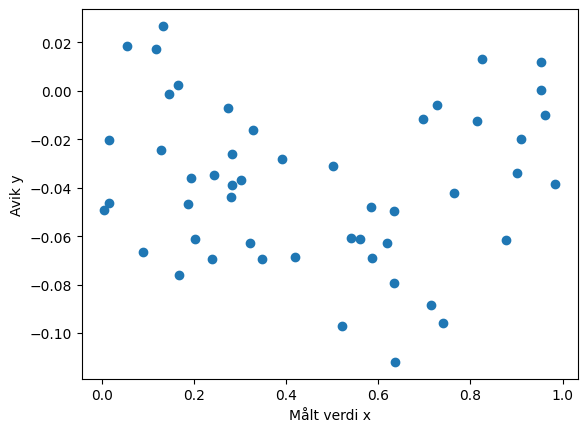

In [2]:
import matplotlib.pyplot as plt

# Her kan du skrive kode for å generere plott det spørres etter.
plt.scatter(x,y)
plt.xlabel("Målt verdi x")
plt.ylabel("Avik y")
plt.show()

Ser det ut som vi har å gjøre med en ideell blanding? Begrunn svaret ditt.

Det ser ikke ut som en ideell blanding, ettersom aviket i mange av punktene er langt unna 0,0


## Deloppgave b)

Utled sannsynlighetsmaksimeringsestimatoren for $\beta$ og vis at denne kan skrives å formen 

\begin{align*}
\hat{\beta} = \frac{\sum_{i=1}^n x_i(1-x_i)Y_i}{\sum_{i=1}^n(x_i(1-x_i))^2}.
\end{align*}

Skriv og kjør pythonkode for å regne ut estimatet for $\beta$ for datasettet gitt i fila "blanding.csv".

In [3]:
# Her kan du skrive koden for å beregne estimatet for beta
numerator = 0
denumerator = 0
for i in range(50):
    numerator += x[i]*(1-x[i])*y[i]
    denumerator += (x[i]*(1-x[i]))**2

beta_hat = numerator/denumerator
print(beta_hat)

-0.2323680923148909


## Deloppgave c)

Finn forventningsverdi og varians for estimatoren $\hat{\beta}$. <em>Hint: Husk at det kun er $Y_i$'ene som er stokastiske variabler, $x_i$'ene er tall.

## Deloppgave d)

Forklar hvorfor $\hat{\beta}$ er normalfordelt.

Utled et $(1-\alpha)\cdot 100\%$-konfidensintervall for $\beta$. Uttrykk først konfidensintervallet som en funksjon av $x_i$'ene, $y_i$'ene, $\sigma^2$ og $\alpha$, og skriv og kjør deretter pythonkode for å regne ut intervallet numerisk for $\alpha=0.05$. <em>Hint: For å utlede konfidensintervallet, start med å standardisere $\hat{\beta}$.</em>

In [8]:
# Her kan du skrive kode for å beregne konfidensintervallet numerisk

z_0_025 = 1.960
sigmasq = 0.025**2
num = np.sqrt(sigmasq)*z_0_025
denum = 0
for i in range(50):
     denum += (x[i]*(1-x[i]))**2
d = num/np.sqrt(denum)
start = beta_hat - d
end = beta_hat + d

print(f"[{start},{end}]")

[-0.27153008210129775,-0.193206102528484]


Ut fra dette (numeriske) intervallet, ser det her ut som om vi har å gjøre med en ideell blanding? Begrunn svaret.

#### Her er deloppgave d) slutt

Anta så at vi er interessert i en ny måling som vi enda ikke har gjort. I denne målingen skal vi blande $x_0$ andeler av væske A med $1-x_0$ andeler av væske B og vi lar $Y_0$ være det observerte avviket fra i volum fra en ideell væske som vi kommer til å observere. Vi skal starte med å fokusere på forventningsverdien til $Y_0$, som vi betegner som $\mu_0$ og som i følge antagelsene som er gjort over er gitt som 

\begin{align*}
\mu_0 = E[Y_0] = \beta x_0 (1-x_0).
\end{align*}

## Deloppgave e)

Foreslå en estimator, $\hat{\mu}_0$, for $\mu_0$. Hvilken type sannsynlighetsfordeling har $\hat{\mu}_0$?

Finn forventningsverdi og varians for $\hat{\mu}_0$. 

Utled et $(1-\alpha)\cdot 100\%$-konfindensintervall for $\mu_0$. Finn et uttrykk for konfidensintervallet som funksjon av $x_i$'ene, $y_i$'ene, $\sigma^2$, $\alpha$ og $x_0$.

For $\alpha=0.05$, regn ut konfidensintervallet numerisk for ulike verdier av $x_0\in[0,1]$ og plott øvre og nedre grense i konfidensintervallet som en kurve (som funksjon av $x_0$) i samme plott som spredningsplottet du lagde i deloppgave a). Når du ser på plottet du har laget, hva tenker du om bredden på konfidensintervallet (for ulike verdier av $x_0$) i forhold til den spredningen du ser i de observerte verdiene for $y_i$'ene?

## Fasit:
* Oppgave 1c): $E[\hat{\beta}]=\beta$, $\mbox{Var}[\hat{\beta}]=\sigma^2\left/\sum_{i=1}^n(x_i(1-x_i))^2\right.$
* Oppgave 1d): $[-0.2715 , -0.1932]$
* Oppgave 1e): $E[\hat{\mu}_0]=\mu_0$, $\mbox{Var}[\hat{\mu}_0]=\sigma^2(x_0(1-x_0))^2\left/\sum_{i=1}^n (x_i(1-x_i))^2\right.$